In [1]:
import pandas as pd


In [2]:
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
import plotly.graph_objects as go
import chart_studio.plotly as py
from datetime import date, timedelta
import datetime as dt
from matplotlib import dates, ticker
from dateutil.parser import parse 

In [3]:
df = pd.read_json(r"C:\Users\zhanna\Desktop\Netology\Responses\Response_all1.json")

In [4]:
df1 = pd.read_csv(r"C:\Users\zhanna\Desktop\Netology\Diploma\export_receipts.csv")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67734 entries, 0 to 67733
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  67734 non-null  int64 
 1   Группа клиента  47550 non-null  object
 2   Кол-во гостей   67734 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ MB


In [6]:
df1.columns

Index(['transaction_id', 'Группа клиента', 'Кол-во гостей'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67586 entries, 0 to 67585
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     67586 non-null  int64  
 1   table_id           67586 non-null  int64  
 2   spot_id            67586 non-null  int64  
 3   client_id          67586 non-null  int64  
 4   sum                67586 non-null  float64
 5   payed_sum          67586 non-null  float64
 6   payed_cash         67586 non-null  float64
 7   payed_card         67586 non-null  float64
 8   payed_cert         67586 non-null  float64
 9   payed_bonus        67586 non-null  float64
 10  payed_third_party  67586 non-null  int64  
 11  payed_card_type    67586 non-null  int64  
 12  round_sum          67586 non-null  int64  
 13  tips_cash          67586 non-null  int64  
 14  tips_card          67586 non-null  int64  
 15  pay_type           67586 non-null  int64  
 16  reason             675

In [8]:
df.columns

Index(['transaction_id', 'table_id', 'spot_id', 'client_id', 'sum',
       'payed_sum', 'payed_cash', 'payed_card', 'payed_cert', 'payed_bonus',
       'payed_third_party', 'payed_card_type', 'round_sum', 'tips_cash',
       'tips_card', 'pay_type', 'reason', 'tip_sum', 'bonus', 'discount',
       'print_fiscal', 'total_profit', 'date_close', 'products'],
      dtype='object')

# Подготовка и очистка данных


In [9]:
payments = pd.merge(df[['transaction_id', 'client_id', 'payed_sum', 'payed_cash', 'date_close', 'products']], df1, on = 'transaction_id', how = 'left')


In [10]:
payments.columns

Index(['transaction_id', 'client_id', 'payed_sum', 'payed_cash', 'date_close',
       'products', 'Группа клиента', 'Кол-во гостей'],
      dtype='object')

In [11]:
payments['date_close']= pd.to_datetime(payments['date_close']).dt.normalize()

In [12]:
payments["Группа клиента"].fillna('no_group', inplace= True)

In [13]:
payments = payments[payments['payed_sum'] != 0].sort_values(
    ['client_id','date_close','transaction_id']).loc[~payments["Группа клиента"].isin(
    ['Сотрудники', 'Управление Кальянного бара', 'Управление', 'Кальянщики', 'Премиальная группа (сотрудники)']
)].loc[payments['client_id']>1]

In [14]:
payments

,transaction_id,client_id,payed_sum,payed_cash,date_close,products,Группа клиента,Кол-во гостей
67421,191,3,180.0,180.0,2018-02-07,"[{'product_id': 65, 'modification_id': 16, 'ty...",Бонус 10%,1
67289,330,3,200.0,200.0,2018-02-08,"[{'product_id': 237, 'modification_id': 8, 'ty...",Бонус 10%,1
67283,331,3,262.5,262.5,2018-02-09,"[{'product_id': 24, 'modification_id': 0, 'typ...",Бонус 10%,1
67236,377,3,200.0,200.0,2018-02-09,"[{'product_id': 237, 'modification_id': 8, 'ty...",Бонус 10%,1
67184,445,3,277.5,277.5,2018-02-09,"[{'product_id': 23, 'modification_id': 0, 'typ...",Бонус 10%,1
...,...,...,...,...,...,...,...,...
14,67665,11736,6850.0,0.0,2021-03-02,"[{'product_id': 409, 'modification_id': 0, 'ty...",Бонус 5%,5
35,67636,11740,2740.0,2740.0,2021-03-01,"[{'product_id': 85, 'modification_id': 0, 'typ...",Бонус 5%,1
34,67637,11741,4660.0,4660.0,2021-03-01,"[{'product_id': 114, 'modification_id': 928, '...",Бонус 2%(скидка 0%),2
28,67649,11742,2890.0,0.0,2021-03-01,"[{'product_id': 84, 'modification_id': 0, 'typ...",Бонус 2%(скидка 0%),2


# Группировка и расчет метрик

In [15]:
clients = payments.groupby(
    ['client_id', 'date_close', 'Группа клиента']
).agg({'payed_sum':'sum',
       'payed_cash':'sum',
      'Кол-во гостей':'max'
     }).reset_index()

In [16]:
#average transaction value per client
client_grouping1 = clients.groupby('client_id') 
clients['ATV'] = client_grouping1['payed_sum'].transform('mean').round(2)

In [17]:
#median transaction value per client
clients['median_transaction'] = client_grouping1['payed_sum'].transform('median').round(2)

In [18]:
clients['cash_per_client'] = client_grouping1['payed_cash'].transform('mean').round(2)

In [19]:
#share of cash in transactions per client 
clients['share_of_cash%'] = client_grouping1['payed_cash'].transform('sum').div(client_grouping1['payed_sum'].transform('sum')).mul(100).round(2)


In [20]:
#average amount of guests per visit
clients['mean_num_guests'] =  client_grouping1['Кол-во гостей'].transform('mean').round()


In [21]:
#average purchase per guest
clients['payed_per_guest'] = client_grouping1['payed_sum'].transform('sum').div(client_grouping1['Кол-во гостей'].transform('sum')).round(2)


In [22]:
#amount of visits per client
clients['visits_per_client'] = client_grouping1['payed_sum'].transform('count')

In [23]:
clients['repeat_customer'] =np.where(clients['visits_per_client']>1, True, False)

In [24]:
clients['mean_interval_days'] = client_grouping1['date_close'].transform(lambda x: x.diff().mean().round('1d').days)
   

In [25]:
bins = [0, 2, 7, 14, 21, 30, 61, 1000]
labels = ['0-2 days', '2 days-1 week', '1-2 weeks', '2-3 weeks', '3weeks-1 month', '1-2 months', '>2 months']
clients['visit_intervals'] = pd.cut(clients['mean_interval_days'], bins, labels = labels)

#first day
clients['weekday'] = (client_grouping1['date_close'].transform('first')).dt.day_name()

In [26]:
clients['weekday'] = clients['date_close'].dt.day_name()

In [27]:
#clients[clients['date_close']=='2019-05-03']

In [28]:
list_of_public_holidays = pd.to_datetime(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
                           '2018-02-23', '2018-03-08', '2018-03-09', '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-09',
                           '2018-06-11', '2018-06-12', '2018-11-04', '2018-11-05', '2018-12-31',
                           '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
                           '2019-02-23', '2019-03-08', '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-09','2019-05-10', 
                           '2019-06-12', '2018-11-04',
                           '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
                           '2020-02-23', '2020-02-24', '2020-03-08', '2020-03-09', '2020-05-01', '2020-05-04','2020-05-05', '2020-05-09','2020-05-11', 
                           '2020-06-12', '2020-11-04'])

                                                    
#clients['holiday'] = client_grouping1['date_close'].transform('first').isin(list_of_public_holidays)
    #clients.groupby('client_id').date_close.first())
clients['holiday'] = clients['date_close'].isin(list_of_public_holidays)

In [29]:
clients.columns

Index(['client_id', 'date_close', 'Группа клиента', 'payed_sum', 'payed_cash',
       'Кол-во гостей', 'ATV', 'median_transaction', 'cash_per_client',
       'share_of_cash%', 'mean_num_guests', 'payed_per_guest',
       'visits_per_client', 'repeat_customer', 'mean_interval_days',
       'visit_intervals', 'weekday', 'holiday'],
      dtype='object')

In [30]:
clients['duration'] = clients.groupby(['client_id'])['date_close'].diff().dt.days

In [31]:
clients['clients_per_date'] = clients.groupby('date_close').client_id.transform('count')

# Выявление корреляций

In [32]:
#correlation between columns
corr = clients[['ATV', 'mean_interval_days', 'median_transaction', 'cash_per_client', 'share_of_cash%', 'mean_num_guests','payed_per_guest', 'visits_per_client' ]].corr()

In [33]:
corr

,ATV,mean_interval_days,median_transaction,cash_per_client,share_of_cash%,mean_num_guests,payed_per_guest,visits_per_client
ATV,1.000000,0.238993,0.965037,0.758455,0.004485,0.572675,0.717236,-0.184325
mean_interval_days,0.238993,1.000000,0.295493,0.217101,0.069642,0.276792,0.083110,-0.331223
median_transaction,0.965037,0.295493,1.000000,0.727787,0.004907,0.573074,0.685275,-0.214290
cash_per_client,0.758455,0.217101,0.727787,1.000000,0.506668,0.424621,0.565408,-0.177134
share_of_cash%,0.004485,0.069642,0.004907,0.506668,1.000000,0.042958,-0.032362,-0.115382
mean_num_guests,0.572675,0.276792,0.573074,0.424621,0.042958,1.000000,0.018104,-0.195337
payed_per_guest,0.717236,0.083110,0.685275,0.565408,-0.032362,0.018104,1.000000,-0.049227
visits_per_client,-0.184325,-0.331223,-0.214290,-0.177134,-0.115382,-0.195337,-0.049227,1.000000


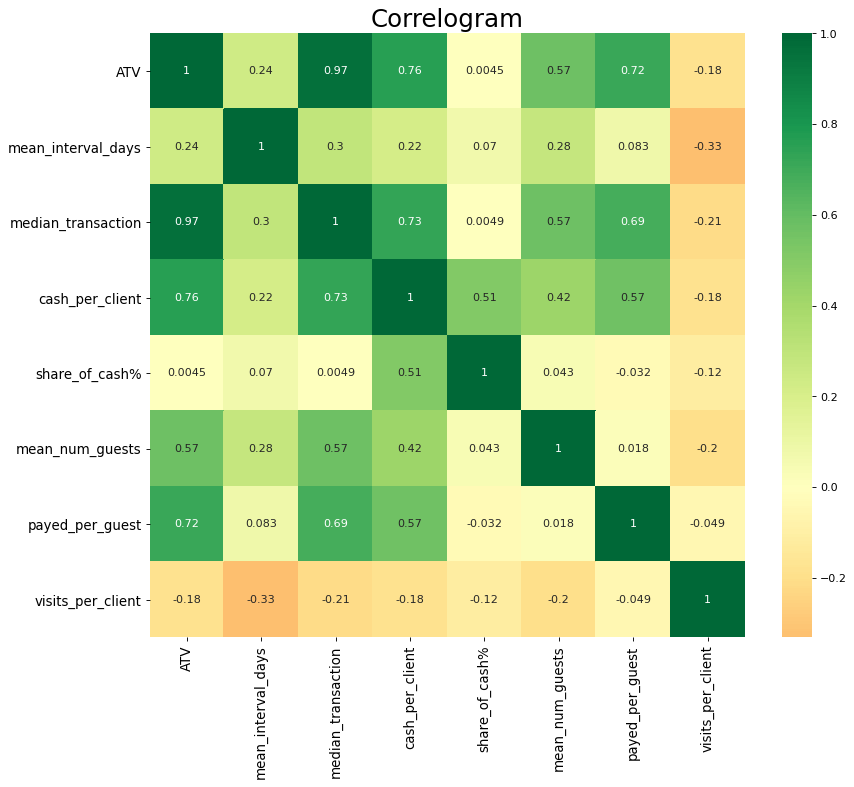

In [34]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Correlogram.png')
plt.show()


###### На коррелограмме значительная положительная корреляция обнаружена у ATV с медианным чеком, суммой, потраченной на одного гостя, средним количеством гостей, небольшая положительная корреляция имеется между средним чеком и интервалом посещений, средним количеством гостей и средним чеком. 
###### Также удалось выявить небольшую обратную корреляцию между ATV и количеством визитов клиента. Предполагаемая корреляция между долей наличных в оплате и средним чеком отсутствует. 
###### Таким образом, можно сделать вывод о том, что гости, посещающие компанию с более длительным интервалом, оставляют больше денег в каждое посещение, и приводят с собой больше гостей

# Анализ состава стола

In [35]:
guests = pd.cut(clients["Кол-во гостей"], [0, 1, 2, 6, 20], labels=['solo', 'pair', '3-6', '7 and more'])

In [36]:
guest_per_client = clients.pivot_table("Кол-во гостей", ['client_id'], guests,
                        aggfunc = lambda x: x.count()).fillna(0)


In [37]:
#pivot table - groups guests per client
guest_per_client

Кол-во гостей,solo,pair,3-6,7 and more
client_id,,,,
3,77.0,29.0,0.0,0.0
4,39.0,1.0,1.0,0.0
5,25.0,0.0,1.0,0.0
7,21.0,8.0,0.0,0.0
8,161.0,46.0,12.0,0.0
...,...,...,...,...
11736,0.0,1.0,1.0,0.0
11740,1.0,0.0,0.0,0.0
11741,0.0,1.0,0.0,0.0


In [38]:
guest_per_client_frequency = clients.pivot_table("Кол-во гостей", ['visit_intervals'], guests,
                        aggfunc = lambda x: x.count()).fillna(0)
guest_per_client_frequency

Кол-во гостей,solo,pair,3-6,7 and more
visit_intervals,,,,
0-2 days,767,736,376,4
2 days-1 week,4133,2528,864,26
1-2 weeks,1507,1362,703,30
2-3 weeks,600,979,360,11
3weeks-1 month,490,940,354,14
1-2 months,549,1521,718,29
>2 months,452,2165,1217,70


In [39]:
guest_per_client_percentage = pd.crosstab(index = clients.client_id, 
            columns =  guests, 
            values = clients["Кол-во гостей"], 
            aggfunc = lambda x: x.count(), normalize='index').round(4)*100
                                 
guest_per_client_percentage

Кол-во гостей,solo,pair,3-6,7 and more
client_id,,,,
3,72.64,27.36,0.00,0.0
4,95.12,2.44,2.44,0.0
5,96.15,0.00,3.85,0.0
7,72.41,27.59,0.00,0.0
8,73.52,21.00,5.48,0.0
...,...,...,...,...
11736,0.00,50.00,50.00,0.0
11740,100.00,0.00,0.00,0.0
11741,0.00,100.00,0.00,0.0


In [40]:
guest_per_client_group = pd.crosstab(index = clients['Группа клиента'], 
                         columns =  guests, 
                        values = clients["Кол-во гостей"], 
            aggfunc = lambda x: x.count(), normalize='index').round(4)*100
 
guest_per_client_group

Кол-во гостей,solo,pair,3-6,7 and more
Группа клиента,,,,
Avito people -10%,0.00,0.00,100.00,0.00
Mini people 5%,0.00,18.18,72.73,9.09
Бонус 10%,33.02,46.39,19.64,0.95
Бонус 15%,34.05,44.47,21.07,0.40
Бонус 2%(скидка 0%),11.57,57.50,29.67,1.26
Бонус 5%,20.99,53.46,23.77,1.78
Бронирование стола,1.62,53.19,40.72,4.46
Депозиты,83.28,12.32,4.40,0.00
Друзья 20%,70.61,22.24,6.89,0.27


In [41]:
guest_per_client_frequency = pd.crosstab(index = clients['visit_intervals'], 
                         columns =  guests, 
                        values = clients["Кол-во гостей"], 
            aggfunc = lambda x: x.count(), normalize='index').round(4)*100
 
guest_per_client_frequency

Кол-во гостей,solo,pair,3-6,7 and more
visit_intervals,,,,
0-2 days,40.73,39.09,19.97,0.21
2 days-1 week,54.73,33.48,11.44,0.34
1-2 weeks,41.84,37.81,19.52,0.83
2-3 weeks,30.77,50.21,18.46,0.56
3weeks-1 month,27.25,52.28,19.69,0.78
1-2 months,19.49,53.99,25.49,1.03
>2 months,11.58,55.46,31.17,1.79


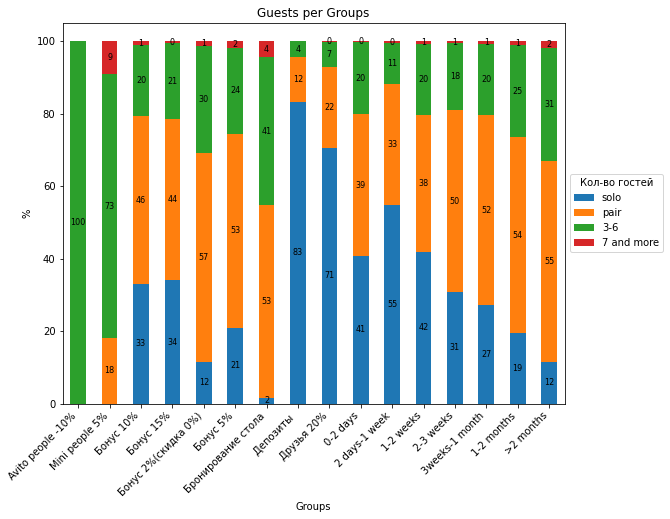

In [42]:
all_groups =pd.concat([guest_per_client_group, guest_per_client_frequency], axis=0)
my_plot = all_groups.plot(kind='bar',stacked=True,title="Guests per Groups",figsize=(9, 7))
for i, rect in enumerate(my_plot.patches):
    
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

   
    if height > 0.001:
        my_plot.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

my_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Кол-во гостей")
my_plot.set_xticklabels(all_groups.index, rotation=45, ha='right')
my_plot.set_xlabel("Groups")
my_plot.set_ylabel("%")
my_plot.figure.savefig('Guests per Groups.png')


###### Согласно накопительной гистограмме "Guests per Groups", большинство часто приходящих гостей (интервал от 0 до трёх недель) предпочитает приходить в одиночку либо парами. Та же тенденция просматривается у посетителей с большими бонусными скидками - чем больше скидка и чем чаще гость посещает кафе, тем выше вероятность, что он придет один или только с одним гостем


# Анализ состава чека

In [43]:
p_lists = []
for i, plist in payments [['transaction_id', 'products']].values:
    p_df = pd.DataFrame(plist)
    p_df['transaction_id'] = i
    p_lists.append(p_df)
p_df = pd.concat(p_lists)

In [44]:
p_df.columns

Index(['product_id', 'modification_id', 'type', 'workshop_id', 'num',
       'product_sum', 'payed_sum', 'cert_sum', 'bonus_sum', 'bonus_accrual',
       'round_sum', 'discount', 'tax_fiscal', 'product_cost', 'product_profit',
       'transaction_id'],
      dtype='object')

In [45]:
p_df = p_df[['transaction_id','product_id', 'workshop_id', 'num', 'product_sum', 'payed_sum']]

In [46]:
transactions = payments.set_index('transaction_id').join(p_df.set_index('transaction_id'), rsuffix='_p')

In [47]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109585 entries, 21 to 67669
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   client_id       109585 non-null  int64         
 1   payed_sum       109585 non-null  float64       
 2   payed_cash      109585 non-null  float64       
 3   date_close      109585 non-null  datetime64[ns]
 4   products        109585 non-null  object        
 5   Группа клиента  109585 non-null  object        
 6   Кол-во гостей   109585 non-null  int64         
 7   product_id      109585 non-null  int64         
 8   workshop_id     109585 non-null  int64         
 9   num             109585 non-null  int64         
 10  product_sum     109585 non-null  object        
 11  payed_sum_p     109585 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 10.9+ MB


In [48]:
transactions[['payed_sum_p', 'product_sum']] = transactions[['payed_sum_p', 'product_sum']].astype('float')


In [49]:
dicts = clients[['client_id', 'visit_intervals']].set_index(['client_id']).to_dict()['visit_intervals']

In [50]:

transactions['visit_intervals'] = transactions['client_id'].map(dicts)

In [51]:
#pivot table share amount of sold products per workshop 
quantity_percent_workshop = pd.crosstab(index = transactions.client_id, 
            columns = transactions.workshop_id, 
            values = transactions['num'], 
            aggfunc=sum, normalize='index').round(4)*100

In [52]:
quantity_percent_workshop

workshop_id,1,2,3,4
client_id,,,,
3,38.19,29.51,32.29,0.0
4,34.64,35.84,29.52,0.0
5,49.68,9.68,40.65,0.0
7,23.29,26.03,50.68,0.0
8,21.90,36.93,41.17,0.0
...,...,...,...,...
11736,31.82,50.00,18.18,0.0
11740,25.00,25.00,50.00,0.0
11741,44.44,33.33,22.22,0.0


In [53]:
quantity_percent_workshop_group1 = pd.crosstab(index = transactions['Группа клиента'], 
            columns = transactions.workshop_id, 
            values = transactions['num'], 
            aggfunc=sum, normalize='index').round(4)*100
quantity_percent_workshop_group1

workshop_id,1,2,3,4
Группа клиента,,,,
Avito people -10%,50.00,44.44,5.56,0.00
Mini people 5%,46.15,38.46,15.38,0.00
Бонус 10%,49.31,25.36,25.26,0.07
Бонус 15%,42.38,26.51,31.05,0.05
Бонус 2%(скидка 0%),51.31,28.50,20.12,0.06
Бонус 5%,51.15,27.23,21.58,0.05
Бронирование стола,52.14,32.48,15.31,0.07
Депозиты,41.21,28.71,30.08,0.00
Друзья 20%,45.76,28.61,25.53,0.11


In [54]:
quantity_percent_workshop_group2 = pd.crosstab(index = transactions['visit_intervals'], 
            columns = transactions.workshop_id, 
            values = transactions['num'], 
            aggfunc=sum, normalize='index').round(4)*100
quantity_percent_workshop_group2

workshop_id,1,2,3,4
visit_intervals,,,,
0-2 days,38.74,19.87,41.31,0.08
1-2 months,51.81,25.45,22.71,0.03
1-2 weeks,49.67,25.50,24.78,0.05
2 days-1 week,42.85,29.71,27.36,0.08
2-3 weeks,50.28,24.52,25.15,0.05
3weeks-1 month,47.39,26.55,25.99,0.07
>2 months,51.35,28.34,20.22,0.09


In [55]:
sum_share_workshop_pers = pd.crosstab(index = transactions.client_id, 
            columns = transactions.workshop_id, 
            values = transactions.payed_sum_p,
            aggfunc=sum, normalize='index').round(4)*100

In [56]:
#pivot table share payed sum per workshop
sum_share_workshop_pers

workshop_id,1,2,3,4
client_id,,,,
3,18.63,24.51,56.87,0.0
4,47.66,36.65,15.70,0.0
5,33.59,9.08,57.33,0.0
7,21.49,20.18,58.33,0.0
8,16.38,25.61,58.01,0.0
...,...,...,...,...
11736,17.93,36.06,46.01,0.0
11740,12.77,17.88,69.34,0.0
11741,29.18,30.04,40.77,0.0


In [57]:
sum_share_workshop_pers_group1 = pd.crosstab(index = transactions['Группа клиента'], 
            columns = transactions.workshop_id, 
            values = transactions.payed_sum_p,
            aggfunc=sum, normalize='index').round(4)*100
sum_share_workshop_pers_group1

workshop_id,1,2,3,4
Группа клиента,,,,
Avito people -10%,45.83,35.07,19.10,0.00
Mini people 5%,31.09,25.14,43.77,0.00
Бонус 10%,30.63,17.12,52.17,0.08
Бонус 15%,22.44,14.71,62.80,0.05
Бонус 2%(скидка 0%),34.38,19.72,45.85,0.05
Бонус 5%,33.43,18.37,48.07,0.13
Бронирование стола,37.96,23.77,38.04,0.23
Депозиты,28.79,22.26,48.95,0.00
Друзья 20%,23.95,20.27,55.53,0.25


In [58]:
sum_share_workshop_pers_group2 = pd.crosstab(index = transactions['visit_intervals'], 
            columns = transactions.workshop_id, 
            values = transactions.payed_sum_p,
            aggfunc=sum, normalize='index').round(4)*100
sum_share_workshop_pers_group2

workshop_id,1,2,3,4
visit_intervals,,,,
0-2 days,15.21,9.35,75.37,0.07
1-2 months,32.71,17.16,50.11,0.02
1-2 weeks,30.29,16.66,52.94,0.11
2 days-1 week,22.92,18.81,58.16,0.11
2-3 weeks,32.20,16.48,51.29,0.04
3weeks-1 month,30.07,16.84,52.99,0.10
>2 months,33.98,19.07,46.80,0.15


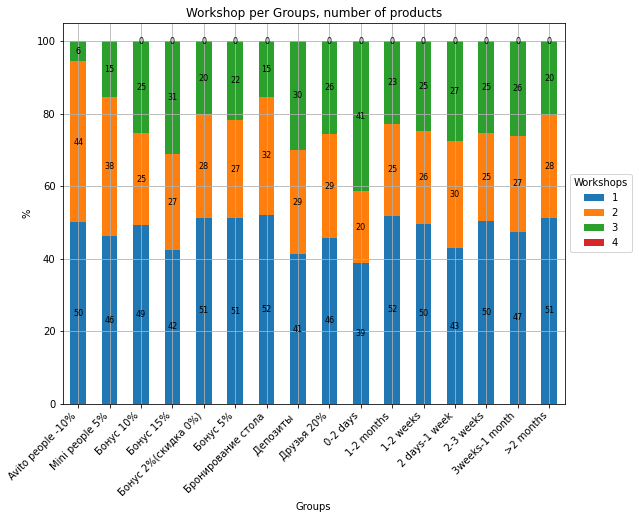

In [59]:
workshop_groups1 =pd.concat([quantity_percent_workshop_group1, quantity_percent_workshop_group2], axis=0)
my_plot_w =workshop_groups1.plot(kind='bar',stacked=True,title="Workshop per Groups, number of products",figsize=(9, 7))

for i, rect in enumerate(my_plot_w.patches):
    
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

   
    if height > 0.001:
        my_plot_w.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)


my_plot_w.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Workshops")
my_plot_w.set_xticklabels(workshop_groups1.index, rotation=45, ha='right')
my_plot_w.set_xlabel("Groups")
my_plot_w.set_ylabel("%")
my_plot_w.grid(True)
my_plot_w.figure.savefig('Workshop per Groups, number of products.png')

###### Диаграмма распределения количества покупок в каждом подразделении "Workshop per Groups, number of products" показывает, что практически все гости, за исключением группы часто посещающих(интервал до двух дней) заказывают больше всего единиц продуктов в первом цехе


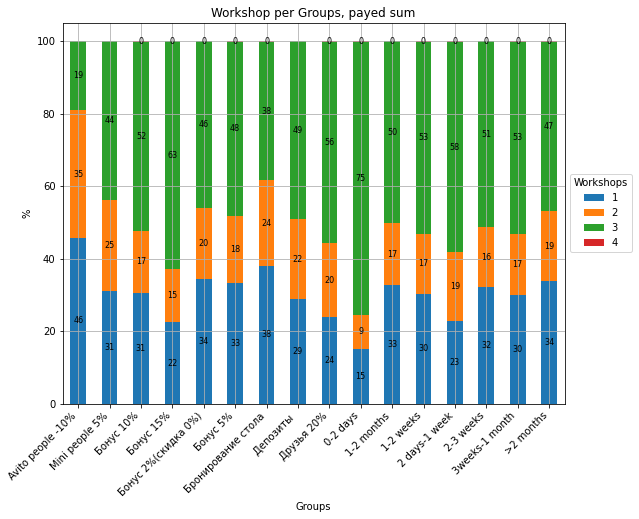

In [60]:
workshop_groups2 =pd.concat([sum_share_workshop_pers_group1, sum_share_workshop_pers_group2], axis=0)
my_plot_w_s =workshop_groups2.plot(kind='bar',stacked=True,title="Workshop per Groups, payed sum",figsize=(9, 7))

for i, rect in enumerate(my_plot_w_s.patches):
    
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

   
    if height > 0.001:
        my_plot_w_s.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

my_plot_w_s.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Workshops")
my_plot_w_s.set_xticklabels(workshop_groups2.index, rotation=45, ha='right')
my_plot_w_s.set_xlabel("Groups")
my_plot_w_s.set_ylabel("%")
my_plot_w_s.grid(True)
my_plot_w_s.figure.savefig('Workshop per Groups, payed sum.png')

###### Наибольшая доля выручки согласно диаграмме "Workshop per Groups, payed sum" приходится на подразделение №3, причем также самый большой показатель приходится на часто посещающих кафе клиентов и гостей с наибольшей скидкой 

# Расчет CRR

In [61]:
def get_month(x): return dt.datetime(x.year, x.month, 1)
clients['visit_month'] = clients['date_close'].apply(get_month)
grouping1 = clients.groupby('client_id')['visit_month']
clients['CohortMonth'] = grouping1.transform('min')


In [62]:

clients['CohortIndexMonth'] = (clients['visit_month'].dt.year - clients['CohortMonth'].dt.year) * 12 + (clients['visit_month'].dt.month - clients['CohortMonth'].dt.month) +1

In [63]:
grouping_count = clients.groupby(['CohortMonth', 'CohortIndexMonth'])
cohort_data = grouping_count['client_id'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndexMonth',
                                  values= 'client_id')
print(cohort_counts.head())

CohortIndexMonth    1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                    
2018-02-01        66.0  57.0  53.0  54.0  53.0  52.0  46.0  44.0  44.0  45.0   
2018-03-01        24.0  10.0  11.0  11.0  11.0   8.0   9.0  10.0   9.0   9.0   
2018-04-01        27.0  15.0   8.0   9.0   5.0   7.0   8.0  11.0   8.0   6.0   
2018-05-01        56.0  22.0  22.0  20.0  15.0  19.0  14.0  13.0  12.0  11.0   
2018-06-01        61.0  26.0  21.0  18.0  19.0  18.0  16.0  17.0  17.0  15.0   

CohortIndexMonth  ...   29    30    31    32    33    34    35    36    37  \
CohortMonth       ...                                                        
2018-02-01        ...  9.0  15.0  19.0  22.0  21.0  16.0  22.0  21.0  20.0   
2018-03-01        ...  3.0   5.0   3.0   2.0   4.0   3.0   2.0   3.0   NaN   
2018-04-01        ...  4.0   5.0   5.0   7.0   3.0   2.0   5.0   1.0   NaN   
2018-05-01        ...  5.0   6.0   8.0  10.0   8.

In [64]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index = retention.index.strftime('%m-%Y')
retention.round(3) * 100


CohortIndexMonth,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
CohortMonth,,,,,,,,,,,,,,,,,,,,,
02-2018,100.0,86.4,80.3,81.8,80.3,78.8,69.7,66.7,66.7,68.2,...,13.6,22.7,28.8,33.3,31.8,24.2,33.3,31.8,30.3,6.1
03-2018,100.0,41.7,45.8,45.8,45.8,33.3,37.5,41.7,37.5,37.5,...,12.5,20.8,12.5,8.3,16.7,12.5,8.3,12.5,NaN,NaN
04-2018,100.0,55.6,29.6,33.3,18.5,25.9,29.6,40.7,29.6,22.2,...,14.8,18.5,18.5,25.9,11.1,7.4,18.5,3.7,NaN,NaN
05-2018,100.0,39.3,39.3,35.7,26.8,33.9,25.0,23.2,21.4,19.6,...,8.9,10.7,14.3,17.9,14.3,10.7,1.8,NaN,NaN,NaN
06-2018,100.0,42.6,34.4,29.5,31.1,29.5,26.2,27.9,27.9,24.6,...,14.8,16.4,13.1,14.8,11.5,NaN,NaN,NaN,NaN,NaN
07-2018,100.0,31.7,26.2,20.6,19.0,15.1,15.1,14.3,8.7,15.9,...,7.9,3.2,7.1,6.3,NaN,NaN,NaN,NaN,NaN,NaN
08-2018,100.0,30.4,20.6,19.6,23.5,20.6,15.7,23.5,20.6,16.7,...,13.7,15.7,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09-2018,100.0,22.6,20.2,16.7,11.9,10.7,7.1,14.3,11.9,11.9,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-2018,100.0,12.2,7.6,6.9,9.2,8.4,6.9,6.9,9.9,12.2,...,3.1,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


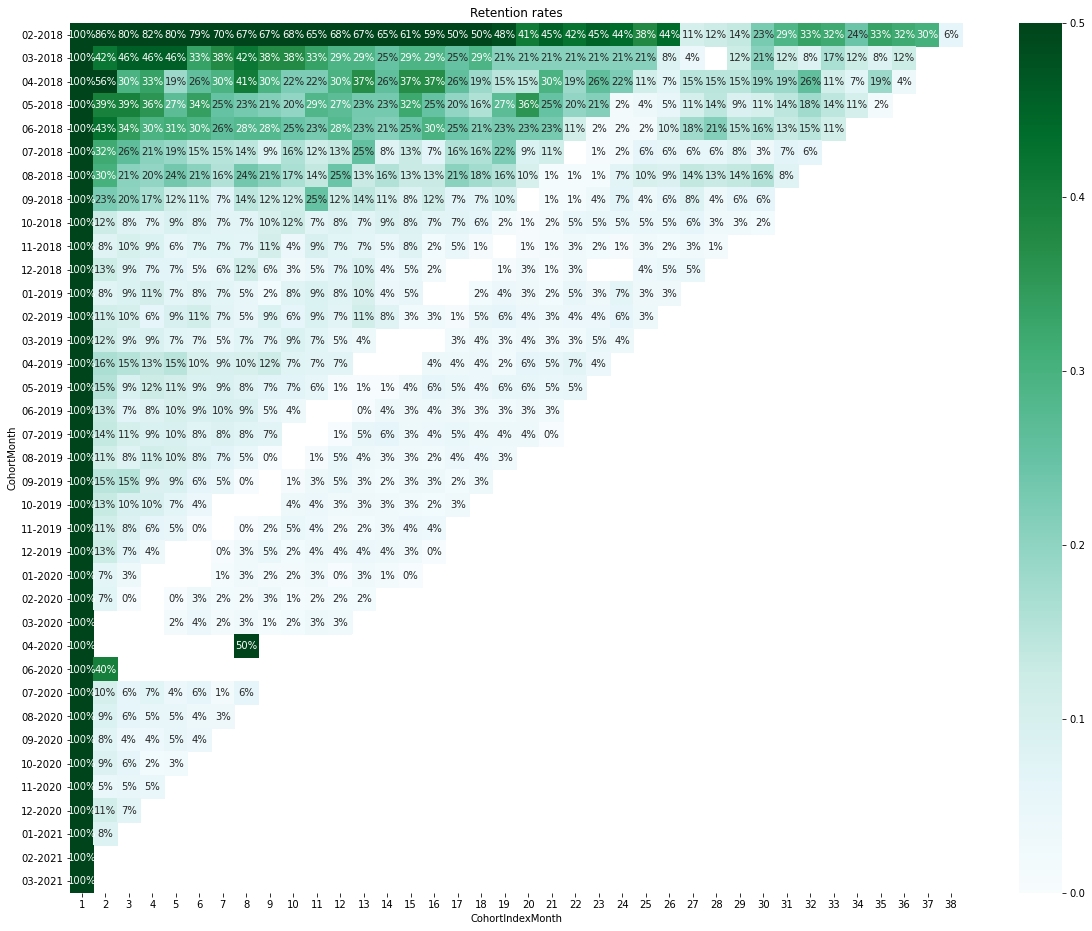

In [65]:

plt.figure(figsize=(20, 16))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt = '.0%',vmin = 0.0, vmax = 0.5, cmap = 'BuGn')
plt.savefig('Retention rates.png')
plt.show()

###### Согласно таблице heatmap "Retention rates", отражающей показатели удержания клиентов по месяцам, наибольший процент удержанных клиентов приходится на период первых девяти месяцев 2018 года. Также таблица отражает период карантнинных ограничений в связи с эпидемией ковида 

In [66]:
plt.savefig('Retention rates.png')

<Figure size 432x288 with 0 Axes>

In [67]:
lookup = {
    
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter',
    1: 'Winter'
}

In [68]:
def year_and_season(x):
    season = lookup[x.month]
    year = x.year
    if x.month == 12:
        year += 1
    return str(season)+'-'+str(year) 
clients['InvoiceYandS'] = clients['date_close'].apply(year_and_season)



In [69]:
grouping2 = clients.groupby('client_id')['InvoiceYandS']
clients['CohortSeason'] = grouping2.transform('first')

In [70]:
seasons = ['Winter-2018', 'Spring-2018', 'Summer-2018', 'Autumn-2018', 'Winter-2019', 'Spring-2019', 'Summer-2019', 'Autumn-2019', 'Winter-2020', 'Spring-2020', 'Summer-2020', 'Autumn-2020', 'Winter-2021', 'Spring-2021']

In [71]:
clients['CohortIndexSeason'] = (clients['visit_month'].dt.year - clients['CohortMonth'].dt.year) *4 + ((clients['visit_month'].dt.month - clients['CohortMonth'].dt.month)/3).apply(np.ceil).apply(int) +1

In [72]:
grouping_count_s = clients.groupby(['CohortSeason', 'CohortIndexSeason'])
cohort_data_s = grouping_count_s['client_id'].apply(pd.Series.nunique).reset_index()
cohort_counts_s = cohort_data_s.pivot(index='CohortSeason',
                                  columns='CohortIndexSeason',
                                  values= 'client_id')
cohort_counts_s = cohort_counts_s.reindex(seasons)



In [73]:
cohort_sizes_s = cohort_counts_s.iloc[:,0]
retention_s = cohort_counts_s.divide(cohort_sizes_s, axis=0)
retention_s.round(3) * 100


CohortIndexSeason,1,2,3,4,5,6,7,8,9,10,11,12,13,14
CohortSeason,,,,,,,,,,,,,,
Winter-2018,100.0,95.5,89.4,83.3,78.8,74.2,71.2,60.6,62.1,43.9,34.8,43.9,40.9,6.1
Spring-2018,100.0,64.5,43.9,40.2,39.3,47.7,36.4,40.2,27.1,15.9,23.4,25.2,8.4,NaN
Summer-2018,100.0,46.4,33.6,31.8,37.4,28.4,37.7,18.0,9.0,19.7,16.6,6.2,NaN,NaN
Autumn-2018,100.0,22.1,15.0,19.3,19.8,16.1,10.2,4.0,7.4,8.2,3.4,NaN,NaN,NaN
Winter-2019,100.0,18.0,16.1,12.2,17.7,8.4,4.5,6.4,7.1,3.5,NaN,NaN,NaN,NaN
Spring-2019,100.0,25.6,19.6,17.2,10.1,4.6,8.6,9.5,3.5,NaN,NaN,NaN,NaN,NaN
Summer-2019,100.0,22.8,19.2,9.6,4.9,8.3,7.6,2.8,NaN,NaN,NaN,NaN,NaN,NaN
Autumn-2019,100.0,22.9,9.6,4.0,7.1,7.1,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Winter-2020,100.0,11.4,2.4,6.0,6.1,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


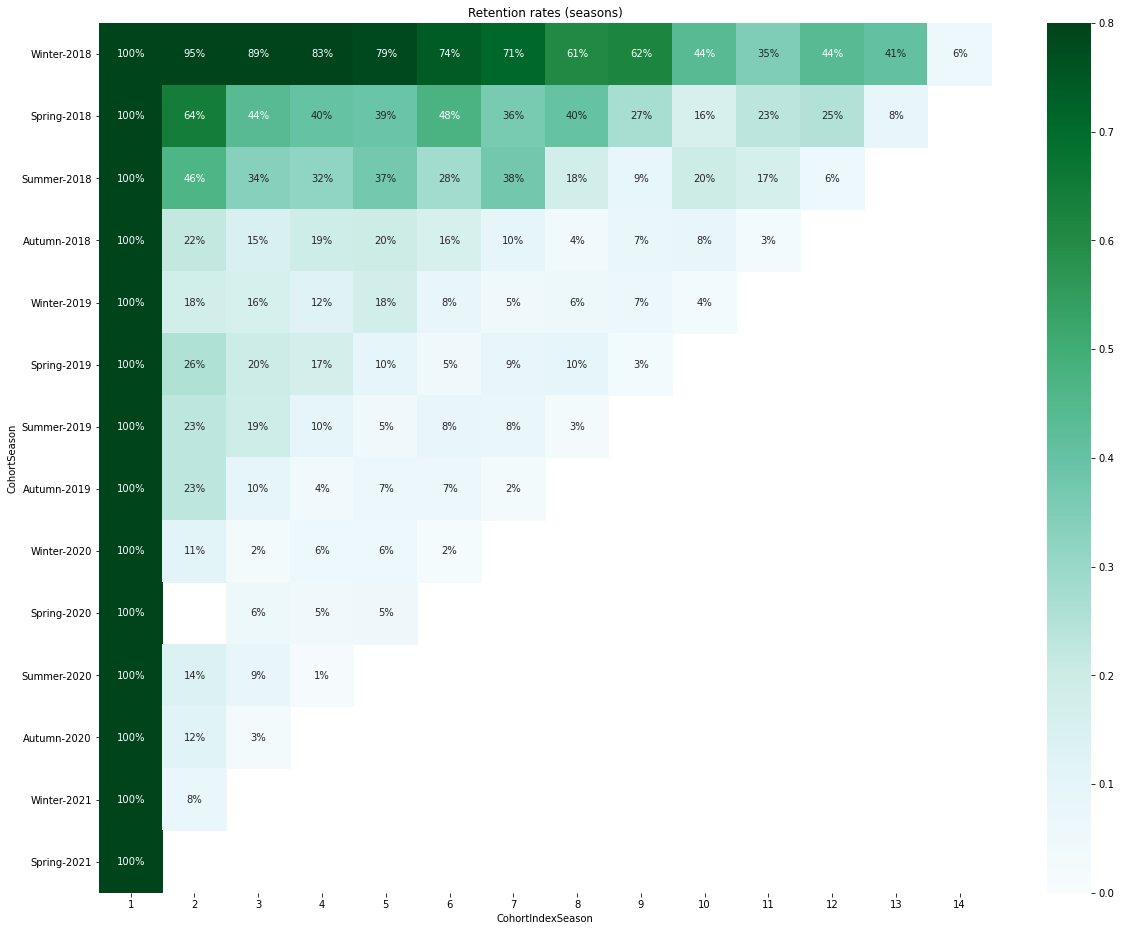

In [74]:
plt.figure(figsize= (20, 16))
plt.title('Retention rates (seasons)')
sns.heatmap(data = retention_s, annot = True, fmt = '.0%',vmin = 0.0, vmax = 0.8, cmap = 'BuGn')
plt.savefig('Retention rates (seasons).png')
plt.show()

###### В таблице CRR по сезонам можно увидеть ранее наблюдавшуюся тенденцию - большинство удержанных клиентов пришли в первых трех сезонах 2018-го года

In [75]:
grouping3 = clients.groupby('client_id')['date_close']
clients['CohortYear'] = (grouping3.transform('min')).dt.year
clients['CohortIndexYear'] = clients['date_close'].dt.year - clients['CohortYear'] +1

In [76]:
grouping_count_y = clients.groupby(['CohortYear', 'CohortIndexYear'])
cohort_data_y = grouping_count_y['client_id'].apply(pd.Series.nunique).reset_index()
cohort_counts_y = cohort_data_y.pivot(index='CohortYear',
                                  columns='CohortIndexYear',
                                  values= 'client_id')

In [77]:
cohort_sizes_y = cohort_counts_y.iloc[:,0]
retention_y = cohort_counts_y.divide(cohort_sizes_y, axis=0)
retention_y.round(3) * 100

CohortIndexYear,1,2,3,4
CohortYear,,,,
2018,100.0,54.2,33.1,11.9
2019,100.0,22.8,5.8,NaN
2020,100.0,6.4,NaN,NaN
2021,100.0,NaN,NaN,NaN


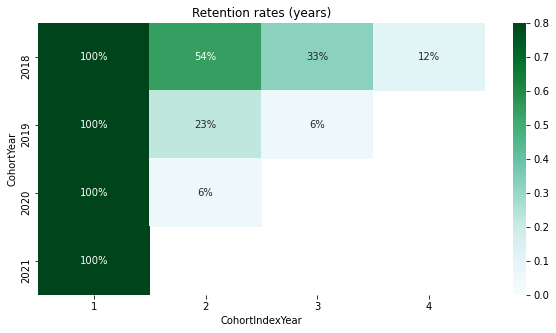

In [78]:
plt.figure(figsize= (10, 5))
plt.title('Retention rates (years)')
sns.heatmap(data = retention_y, annot = True, fmt = '.0%',vmin = 0.0, vmax = 0.8, cmap = 'BuGn')
plt.savefig('Retention rates (years).png')
plt.show()

###### CRR по годам также подтверждает увеличение оттока в последние два года, что может свидетельствовать о недостаточно эффективной работе с удержанием клиентов

# Соотношение количества и выручки клиентов

In [79]:
plot = clients.groupby(['client_id'])['repeat_customer'].first().value_counts().reset_index()
plot

,index,repeat_customer
0,False,4103
1,True,2180


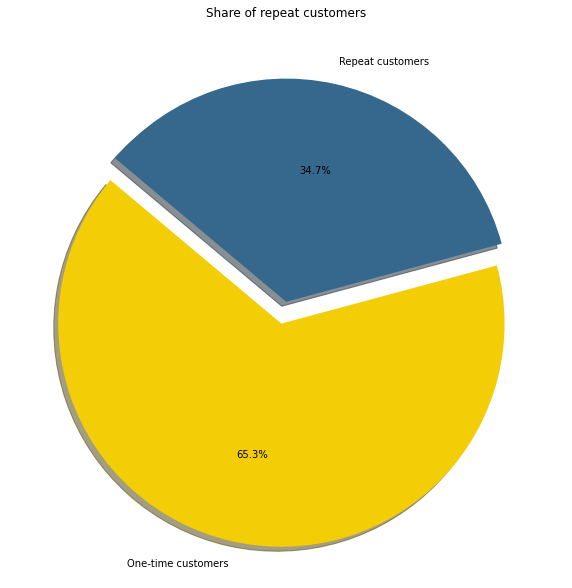

In [80]:
plot = clients.groupby(['client_id'])['repeat_customer'].first().value_counts()
fig = plt.figure(figsize = (10,40))
labels = 'One-time customers', 'Repeat customers'
color = ['#F3CD05', '#36688D']
explode = (0.1, 0)
plt.pie(plot, labels=labels, explode=explode, colors =color, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Share of repeat customers')
plt.savefig('Share of repeat customers.png')
plt.show()

###### Клиенты, посетившие компанию только один раз, составляют 2/3 от общего количества

In [81]:
plot1 = pd.DataFrame(clients.groupby(['repeat_customer'])['payed_sum'].sum())#.reset_index()
plot1


,payed_sum
repeat_customer,
False,11584138.80
True,45089386.87


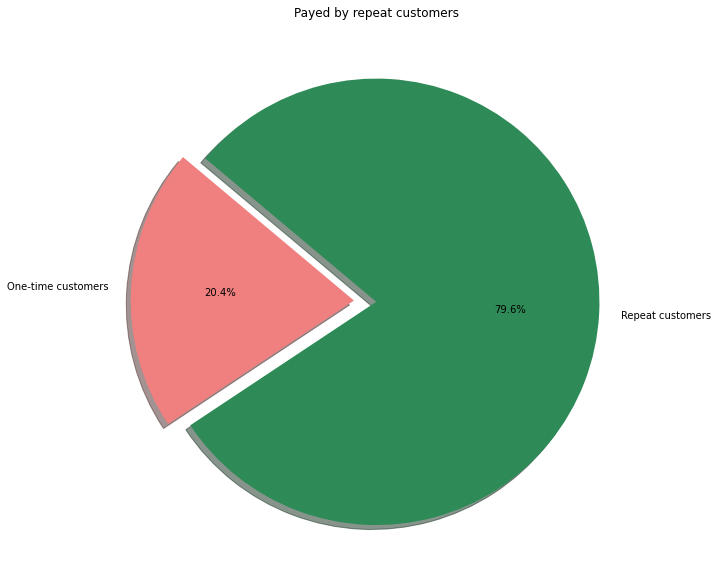

In [82]:
plot1 = clients.groupby(['repeat_customer'])['payed_sum'].sum()
fig = plt.figure(figsize = (10,40))
labels = 'One-time customers', 'Repeat customers'
color = ['#F08080', '#2E8B57']
explode = (0.1, 0)
plt.pie(plot1, labels=labels, explode=explode, colors =color, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Payed by repeat customers')
plt.savefig('Payed by repeat customers.png')
plt.show()

###### Клиенты, посетившие компанию повторно, принесли 3/4 выручки

# Выявление сезонности

In [83]:
data = pd.DataFrame(clients[['clients_per_date', 'date_close', 'holiday', 'weekday', 'InvoiceYandS']].groupby(['date_close','InvoiceYandS','holiday','weekday'])['clients_per_date'].first()).reset_index().set_index('date_close')


In [84]:
data

,InvoiceYandS,holiday,weekday,clients_per_date
date_close,,,,
2018-02-05,Winter-2018,False,Monday,14
2018-02-06,Winter-2018,False,Tuesday,12
2018-02-07,Winter-2018,False,Wednesday,10
2018-02-08,Winter-2018,False,Thursday,9
2018-02-09,Winter-2018,False,Friday,19
...,...,...,...,...
2021-02-26,Winter-2021,False,Friday,31
2021-02-27,Winter-2021,False,Saturday,29
2021-02-28,Winter-2021,False,Sunday,37


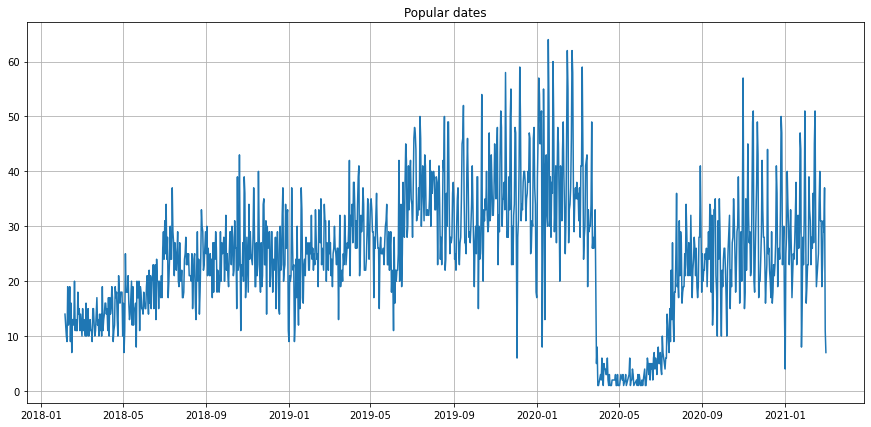

In [85]:
plt.figure(figsize=(15, 7))
plt.plot(data.clients_per_date)
plt.title('Popular dates')
plt.grid(True)
plt.savefig('Popular dates.png')
plt.show()

###### График количества посетителей на каждую дату отчетного периода 'Popular dates'показывает общий рост до апреля-мая 2020 (ограничения в связи с эпидемией), а также сезонные и недельные колебания

In [86]:
dataYears = data.reset_index()
dataYears['year'] = dataYears.date_close.dt.year
dataYears['month'] = dataYears.date_close.dt.month
dataYears = dataYears[['clients_per_date', 'year', 'month']].groupby(['month','year'])['clients_per_date'].sum().unstack()
dataYears  = pd.DataFrame(dataYears.to_records())
dataYears.set_index("month", inplace = True)

In [87]:
dataYears

,2018,2019,2020,2021
month,,,,
1,NaN,684.0,1214.0,873.0
2,316.0,744.0,1150.0,812.0
3,380.0,786.0,958.0,18.0
4,456.0,895.0,69.0,NaN
5,487.0,847.0,51.0,NaN
6,570.0,856.0,113.0,NaN
7,751.0,1147.0,442.0,NaN
8,713.0,1059.0,742.0,NaN
9,715.0,977.0,723.0,NaN


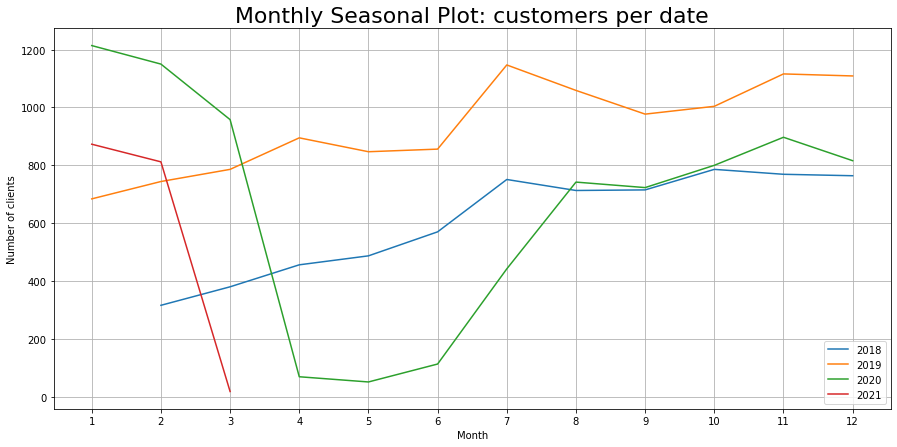

In [88]:
plt.figure(figsize=(15, 7))
plt.plot(dataYears)
plt.xticks(dataYears.index)
plt.legend(dataYears.columns, loc='lower right')
plt.title("Monthly Seasonal Plot: customers per date", fontsize=22)
plt.xlabel("Month")
plt.ylabel("Number of clients")
plt.grid(True)
plt.savefig('Monthly Seasonal Plot - customers per date.png')
plt.show()


###### Для проверки гипотезы сезонности посещения кафе был построен линейный график с наложенеим показателей по месяцам каждого года. На графике можно увидеть тенденцию к повышению посещаемости в периоды 6-7 и 11-12 месяцев каждого года

In [89]:
pd.DataFrame(clients[clients['repeat_customer'] == True][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())

,client_id
date_close,
2018-02-05,14
2018-02-06,12
2018-02-07,10
2018-02-08,9
2018-02-09,19
...,...
2021-02-26,26
2021-02-27,21
2021-02-28,24


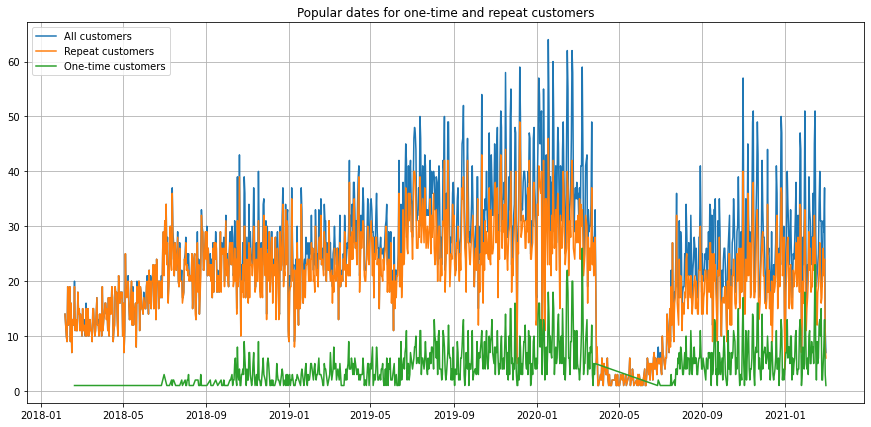

In [90]:
plt.figure(figsize=(15, 7))
plt.plot(data.clients_per_date, label='All customers')
plt.plot(pd.DataFrame(clients[clients['repeat_customer'] == True][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count()), label='Repeat customers')
plt.plot(pd.DataFrame(clients[clients['repeat_customer'] == False][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count()), label='One-time customers')
plt.title('Popular dates for one-time and repeat customers')
plt.legend(loc="upper left")
plt.grid(True)
plt.savefig('Popular dates for one-time and repeat customers.png')
plt.show()

###### Наложив на график 'Popular dates' графики посещения клиентов, совершавших повторные покупки, и клиентов, посетивших компанию один раз, можно у видеть, что для последних также сохраняется сезонность посещений

In [91]:
visits = pd.DataFrame(
    (clients[clients['holiday']==True][['visit_intervals','client_id', 'date_close', 'holiday']].
     groupby(['visit_intervals','date_close'])['client_id'].count()).
    groupby(['visit_intervals']).mean())#drop(['False'], axis=1)
visits.rename(columns = {'client_id':'Holiday'}, inplace=True)
visits

,Holiday
visit_intervals,
0-2 days,1.577778
2 days-1 week,6.444444
1-2 weeks,3.511111
2-3 weeks,1.888889
3weeks-1 month,1.711111
1-2 months,2.777778
>2 months,4.577778


In [92]:
visits1 = pd.DataFrame(
    (clients[((clients['weekday'] == 'Sunday')|(clients['weekday'] == 'Saturday'))&(clients['holiday']!=True)][['visit_intervals','client_id', 'date_close', 'holiday']].
     groupby(['visit_intervals','date_close'])['client_id'].count()).
    groupby(['visit_intervals']).mean())#drop(['False'], axis=1)
visits1.rename(columns = {'client_id':'Weekend'}, inplace=True)
visits1

,Weekend
visit_intervals,
0-2 days,1.722581
2 days-1 week,6.622581
1-2 weeks,3.754839
2-3 weeks,1.974194
3weeks-1 month,1.912903
1-2 months,3.290323
>2 months,4.803226


In [93]:
visits2 = pd.DataFrame(
    (clients[(clients['holiday']!=True)&(clients['weekday'] != 'Sunday')&(clients['weekday'] != 'Saturday')][['visit_intervals','client_id', 'date_close', 'holiday']].
     groupby(['visit_intervals','date_close'])['client_id'].count()).
    groupby(['visit_intervals']).mean())#drop(['False'], axis=1)
visits2.rename(columns = {'client_id':'Business Days'}, inplace=True)
visits2

,Business Days
visit_intervals,
0-2 days,1.688243
2 days-1 week,6.879789
1-2 weeks,3.011889
2-3 weeks,1.655218
3weeks-1 month,1.490092
1-2 months,2.208719
>2 months,2.919419


In [94]:
visit_interval_groups =pd.concat([visits, visits1, visits2], axis=1)
visit_interval_groups 

,Holiday,Weekend,Business Days
visit_intervals,,,
0-2 days,1.577778,1.722581,1.688243
2 days-1 week,6.444444,6.622581,6.879789
1-2 weeks,3.511111,3.754839,3.011889
2-3 weeks,1.888889,1.974194,1.655218
3weeks-1 month,1.711111,1.912903,1.490092
1-2 months,2.777778,3.290323,2.208719
>2 months,4.577778,4.803226,2.919419


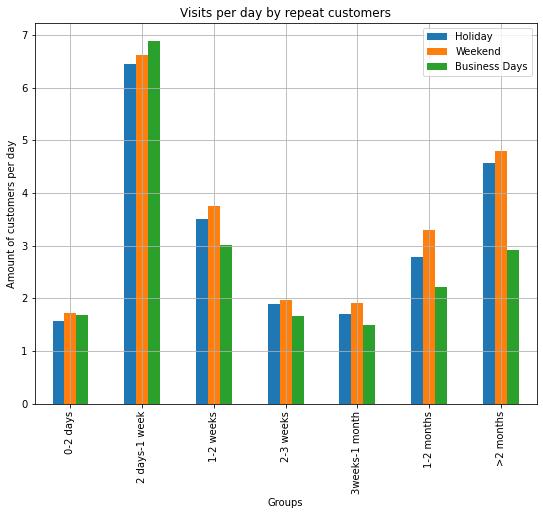

In [95]:
my_plot_v_i =visit_interval_groups.plot(kind='bar', title="Visits per day by repeat customers",figsize=(9, 7))
my_plot_v_i.set_xlabel("Groups")
my_plot_v_i.set_ylabel("Amount of customers per day")
my_plot_v_i.grid(True)
my_plot_v_i.figure.savefig('Visits per day by repeat customer.png')


###### Гистограмма посещений по группам клиентов с разным интервалом приходов показывает, что для часто посещающих гостей характерны незначительные различия между количеством посещений в будние и выходные/праздничные дни, и только для редко посещающих клиентов большее число визитов приходится на нерабочие дни

In [96]:
visits3 = (clients[(clients['repeat_customer']==False)&(clients['holiday']!=True)&(clients['weekday'] != 'Sunday')&(clients['weekday'] != 'Saturday')][['visit_intervals','client_id', 'date_close', 'holiday']].
     groupby(['date_close'])['client_id'].count()).mean()

visits3

4.156488549618321

In [97]:
visits4 = (clients[(clients['repeat_customer']==False)&(clients['holiday']!=True)&((clients['weekday'] == 'Sunday')|(clients['weekday'] == 'Saturday'))][['visit_intervals','client_id', 'date_close', 'holiday']].
     groupby(['date_close'])['client_id'].count()).mean()
visits4

7.063025210084033

In [98]:
visits5 = (clients[(clients['repeat_customer']==False)&(clients['holiday']==True)][['visit_intervals','client_id', 'date_close', 'holiday']].
     groupby(['date_close'])['client_id'].count()).mean()
visits5

7.176470588235294

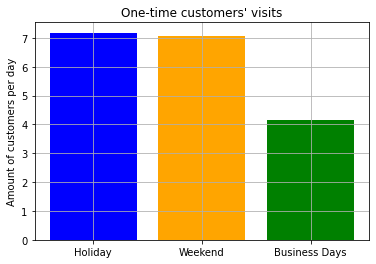

In [99]:
objects = ('Holiday', 'Weekend','Business Days')
y_pos = np.arange(len(objects))
performance = [visits5, visits4, visits3,]

plt.bar(y_pos, performance, align='center', color=['blue', 'orange','g'])
plt.xticks(y_pos, objects)
plt.ylabel('Amount of customers per day')
plt.title("One-time customers' visits")
plt.grid(True)
plt.savefig("One-time customers's visits.png")
plt.show()


###### Из диаграммы "One-time customers's visits", отражающей активность клиентов, посетивших кафе только один раз, можно сделать вывод, что большинство таких клиентов приходили в праздничный или выходной день

In [100]:
clients[(clients['holiday']==True)|(clients['weekday'] == 'Sunday')|(clients['weekday'] == 'Saturday')]['clients_per_date'].mean()

36.05210536435301

In [101]:
clients[clients['holiday']==True]['clients_per_date'].mean()

36.67993630573248

In [102]:
clients[(clients['weekday'] == 'Sunday')|(clients['weekday'] == 'Saturday')]['clients_per_date'].mean()

36.40657257215083

In [103]:
clients[clients['weekday'] == 'Friday']['clients_per_date'].mean()

30.26211671612265

In [104]:
clients[(clients['holiday']!=True)&(clients['weekday'] != 'Sunday')&(clients['weekday'] != 'Saturday')]['clients_per_date'].mean()

26.860289417097693

In [105]:
data_periods_1 = pd.DataFrame(clients[clients['visit_intervals'] == '0-2 days'][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())
data_periods_2 = pd.DataFrame(clients[clients['visit_intervals'] == '2 days-1 week'][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())
data_periods_3 = pd.DataFrame(clients[clients['visit_intervals'] == '1-2 weeks'][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())
data_periods_4 = pd.DataFrame(clients[clients['visit_intervals'] == '2-3 weeks'][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())
data_periods_5 = pd.DataFrame(clients[clients['visit_intervals'] == '3weeks-1 month'][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())
data_periods_6 = pd.DataFrame(clients[clients['visit_intervals'] == '1-2 months'][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())
data_periods_7 = pd.DataFrame(clients[clients['visit_intervals'] == '>2 months'][['client_id', 'date_close']].groupby(['date_close'])['client_id'].count())


In [106]:
def plotMovingAverage1(data, n, c, d, plot_bounds=False, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = data.rolling(window=n).mean()
        
    
    plt.plot(rolling_mean, "g", label=d,  color = c)
    if plot_bounds:
        rolling_std =  data.rolling(window=n).std()
        
            
    plt.legend(loc="upper left")
    
    plt.xticks(rotation=45)

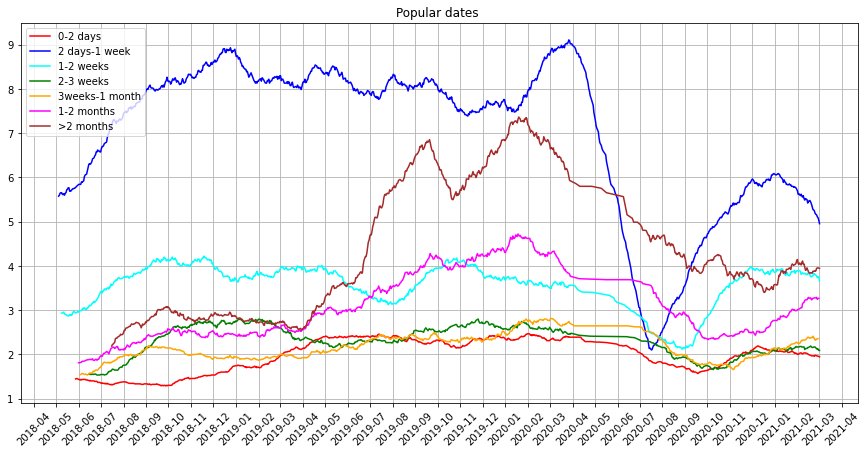

In [107]:
#plt.figure(figsize=(15, 7))
fig, ax = plt.subplots(figsize=(15,7))
plotMovingAverage1(data_periods_1.client_id, 90, 'red', '0-2 days')
plotMovingAverage1(data_periods_2.client_id, 90, 'blue', '2 days-1 week')
plotMovingAverage1(data_periods_3.client_id, 90,  'cyan', '1-2 weeks' )
plotMovingAverage1(data_periods_4.client_id, 90, 'green', '2-3 weeks')
plotMovingAverage1(data_periods_5.client_id, 90, 'orange', '3weeks-1 month')
plotMovingAverage1(data_periods_6.client_id, 90, 'magenta', '1-2 months')
plotMovingAverage1(data_periods_7.client_id, 90,  'brown', '>2 months')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Popular dates ')
plt.grid(True)
plt.savefig('Popular dates for interval groups.png')
plt.show()

###### При анализе посещаемости клиентов в зависимости от группы удалось выявить, что сезонные колебания также наблюдаются больше среди редко посещающих кафе клиентов

In [108]:
def plotMovingAverage(data, n, plot_bounds=False, plot_intervals=False, scale=1.96, plot_anomalies=False):
    rolling_mean = data.rolling(window=n).mean()
        
    fig, ax = plt.subplots(figsize=(15,7))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    if plot_bounds:
        rolling_std =  data.rolling(window=n).std()
        upper_bound = rolling_mean+1.96*rolling_std
        lower_bound = rolling_mean-1.96*rolling_std
        plt.plot(upper_bound, "r--", label="Upper Bound / Lower Bound")
        plt.plot(lower_bound, "r--")
            
    plt.plot(data[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'));
    plt.xticks(rotation=45)

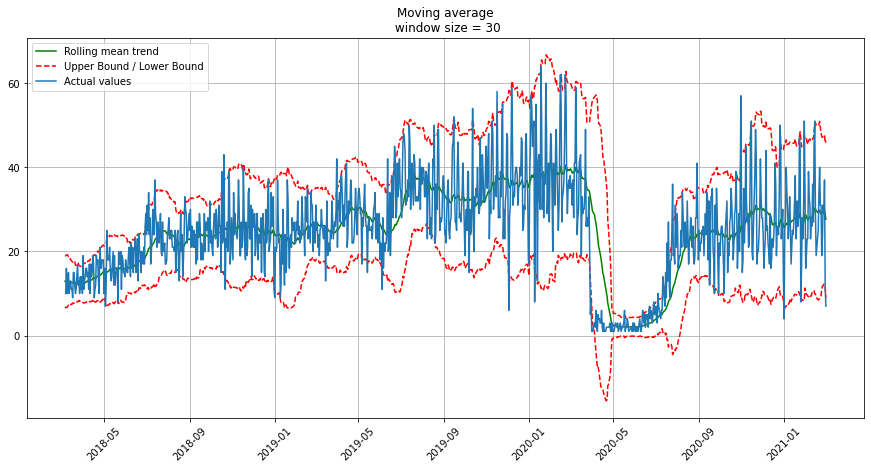

In [109]:
plotMovingAverage(data.clients_per_date, 30, plot_bounds=True, plot_intervals=True, plot_anomalies=True)

###### Временной ряд сглажен до 30 дней для выявления тенденций и сезонности

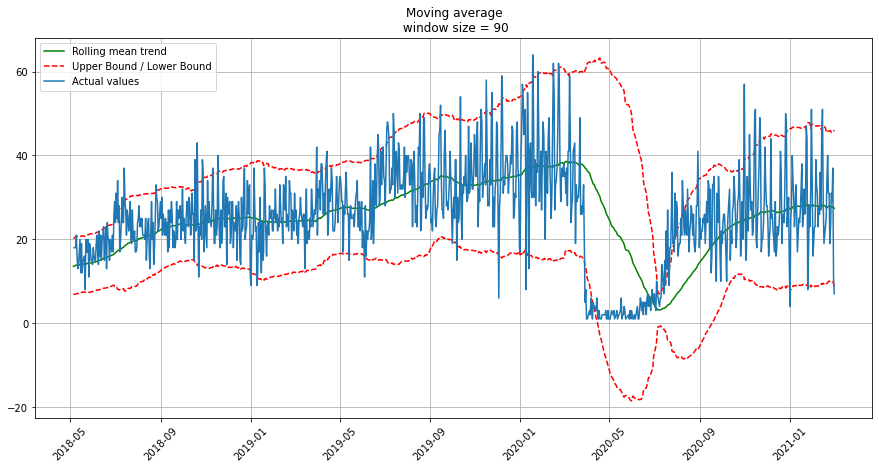

In [110]:
plotMovingAverage(data.clients_per_date, 90, plot_bounds=True, plot_intervals=True, plot_anomalies=True)

###### Динамику сезонных изменений квартальное (90 дней) сглаживание отражает лучше, чем месячное
